In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
import os

In [3]:
os.getcwd()

'C:\\Users\\agarw\\Dropbox\\data-science-bowl-2019'

In [4]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Initial EDA.ipynb',
 'sample_submission.csv',
 'specs.csv',
 'test.csv',
 'train.csv',
 'train_labels.csv']

# EDA

In [5]:
TrainData=pd.read_csv('train.csv')

In [8]:
TrainData.shape

(11341042, 11)

In [9]:
TrainData.keys()

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

In [11]:
TrainData.dtypes

event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count         int64
event_code          int64
game_time           int64
title              object
type               object
world              object
dtype: object

In [20]:
TrainData.head(5)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [14]:
TrainData.describe(include='all')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
count,11341042,11341042,11341042,11341042,11341042,1.134104e+07,1.134104e+07,1.134104e+07,11341042,11341042,11341042
unique,384,303319,10777308,10893749,17000,NaN,NaN,NaN,44,4,4
top,1325467d,6e6e697f2e593de1,2019-08-01T20:08:13.052Z,"{""event_code"": 2000, ""event_count"": 1}",f1c21eda,NaN,NaN,NaN,Chow Time,Game,MAGMAPEAK
freq,274673,3368,11,183676,58988,NaN,NaN,NaN,1150974,5795293,5023687
mean,NaN,NaN,NaN,NaN,NaN,1.056642e+02,3.513838e+03,1.976236e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.483477e+02,6.816470e+02,1.803968e+06,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.000000e+03,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.500000e+01,3.021000e+03,3.061800e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.100000e+01,4.020000e+03,7.276100e+04,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.290000e+02,4.035000e+03,1.574460e+05,NaN,NaN,NaN


* Q: what does event_count represent?

   let us look at how many unique values are there in this column

In [30]:
TrainData['event_count'].unique()

array([   1,    2,    3, ..., 3366, 3367, 3368], dtype=int64)

In [27]:
len(TrainData['event_count'].unique())

3368

In [28]:
min(TrainData['event_count'].unique())

1

In [29]:
max(TrainData['event_count'].unique())

3368

There are 3368 unique values for event_count. These seem to be all the integers from 1 to 3368.

Let us look at the distribution various unique value under the column event_count

In [47]:
# frequency of each unique value under event_count
TrainData.event_count.value_counts()

1       303319
2       117340
3       116006
4       113633
5       112482
6       111158
7       110286
8       109545
9       108960
10      108383
11      107537
12      107070
13      106593
14      105748
15      105148
16      104147
17      103612
18      103014
19      102427
20      101902
21      100924
22      100315
23       99720
24       99111
25       98505
26       97464
27       96575
28       95685
29       94756
30       93785
         ...  
3266         1
3269         1
3268         1
3271         1
3270         1
3273         1
3253         1
3250         1
3251         1
3248         1
3231         1
3230         1
3233         1
3232         1
3235         1
3234         1
3237         1
3236         1
3239         1
3238         1
3241         1
3240         1
3243         1
3242         1
3245         1
3244         1
3247         1
3246         1
3249         1
3368         1
Name: event_count, Length: 3368, dtype: int64

In [58]:
# the event_count values which only occur once
event_count_freq=TrainData.event_count.value_counts()
event_count_freq.loc[event_count_freq==1]

3306    1
3307    1
3304    1
3305    1
3318    1
3302    1
3303    1
3300    1
3308    1
3301    1
3309    1
3316    1
3311    1
3310    1
3313    1
3312    1
3315    1
3314    1
3317    1
3319    1
3299    1
3298    1
3278    1
3296    1
3297    1
3320    1
3276    1
3279    1
3281    1
3280    1
       ..
3266    1
3269    1
3268    1
3271    1
3270    1
3273    1
3253    1
3250    1
3251    1
3248    1
3231    1
3230    1
3233    1
3232    1
3235    1
3234    1
3237    1
3236    1
3239    1
3238    1
3241    1
3240    1
3243    1
3242    1
3245    1
3244    1
3247    1
3246    1
3249    1
3368    1
Name: event_count, Length: 186, dtype: int64

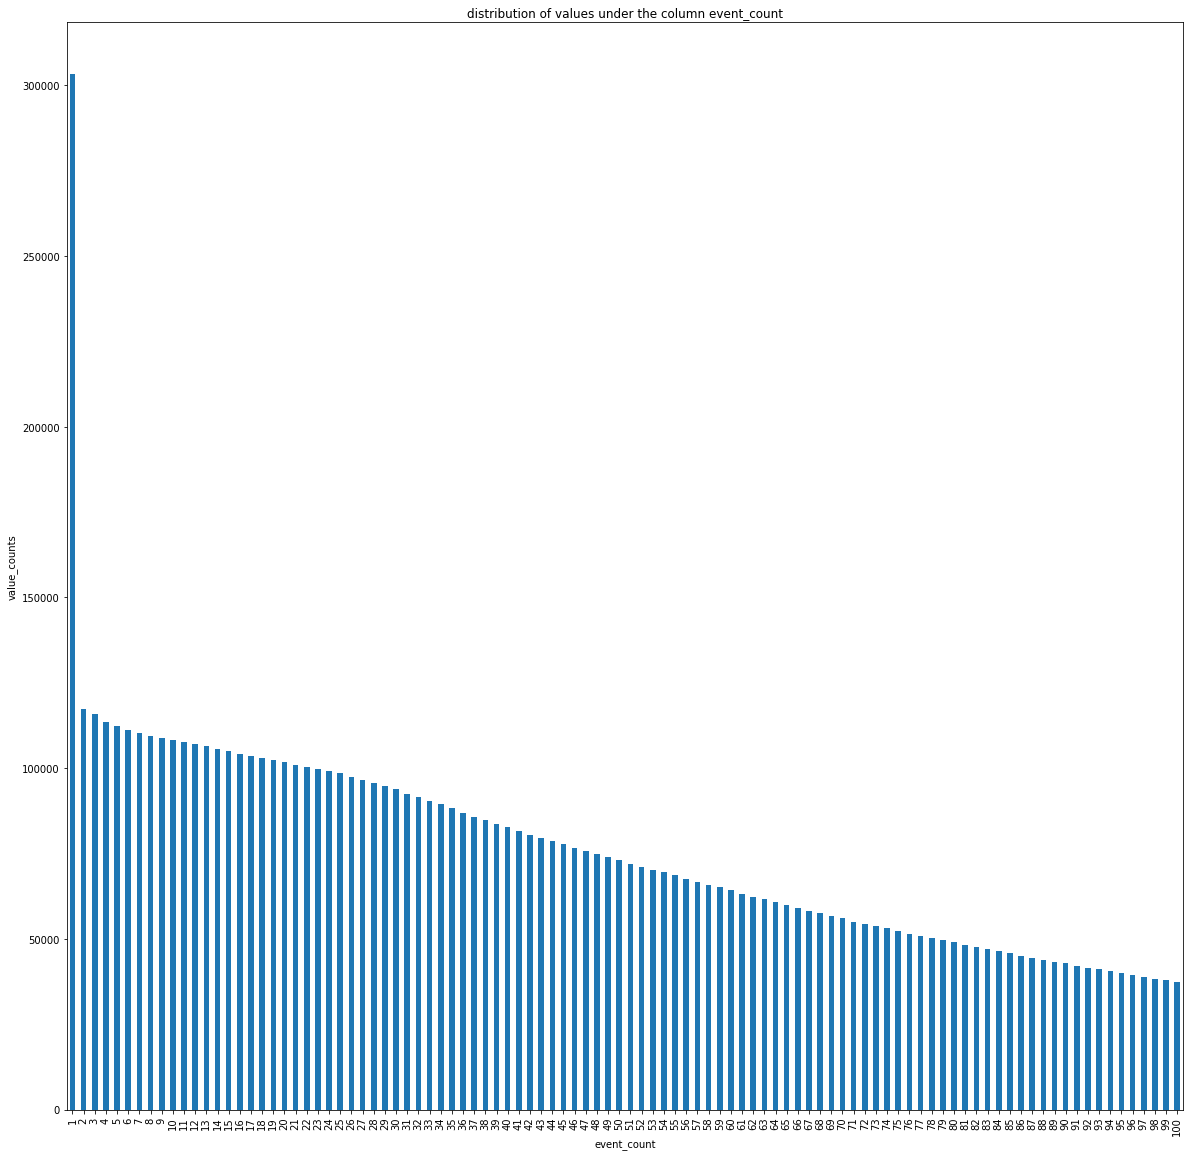

In [41]:
# bar-chart of frequencies of the first the first 100 unique values under event_count
# given that there are 3368 unique values, it is impossible to draw a single bar-chart with all the unique values
plt.figure(figsize=(20,20))
TrainData['event_count'].value_counts()[0:100].plot(kind='bar')
plt.xlabel('event_count')
plt.ylabel('value_counts')
plt.title('distribution of values under the column event_count')
plt.show()

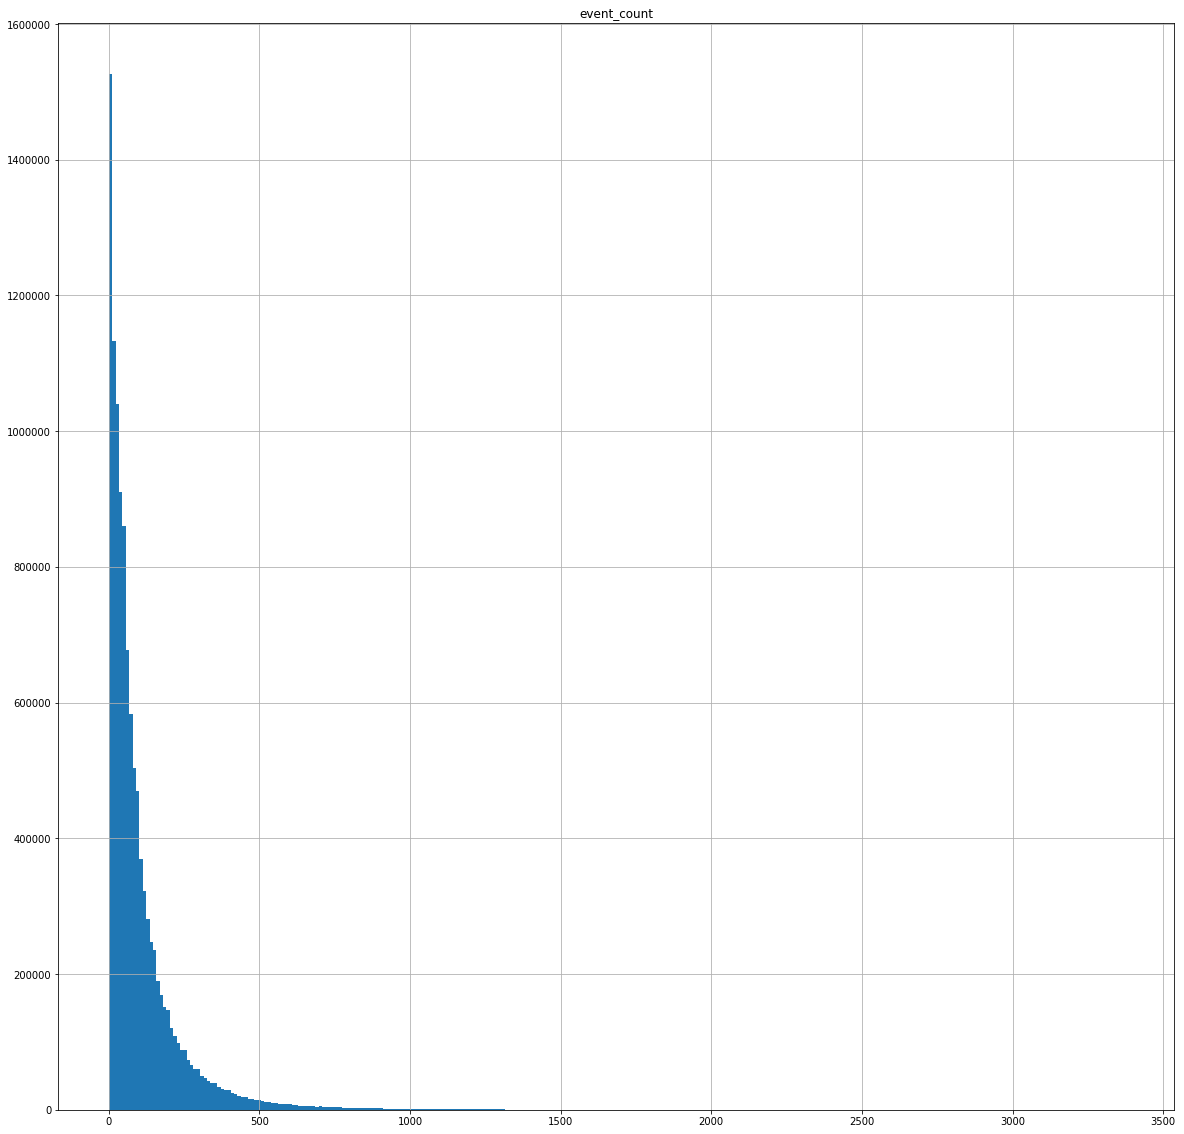

In [51]:
# all the 3368 unique values under event_count can't be put in the same bar-chart,
# therefore, it is best to use collect them into bins and look at these bins.
# We therefore draw a histogram with 300 bins for 'event_count' 
event_count_hist=TrainData.hist(column='event_count', figsize=(20,20), bins=300)

The frequency of occurence for various unique values under event_count seems to rapidly decay with most frequently occuring values lying largely between 1 and 500.  '1' occurs extremely frequently while larger values such as '3306' onwards seem to only occur once. 

In [16]:
TrainLabels=pd.read_csv('train_labels.csv')

In [17]:
TrainLabels.keys()

Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

In [19]:
TrainLabels.dtypes

game_session        object
installation_id     object
title               object
num_correct          int64
num_incorrect        int64
accuracy           float64
accuracy_group       int64
dtype: object

In [21]:
TrainLabels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [23]:
TrainLabels.describe(include='all')

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
count,17690,17690,17690,17690.000000,17690.000000,17690.000000,17690.000000
unique,17690,3614,5,NaN,NaN,NaN,NaN
top,9db2274233788c9a,08987c08,Cart Balancer (Assessment),NaN,NaN,NaN,NaN
freq,1,156,4151,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.760938,1.587790,0.595810,1.885585
std,NaN,NaN,NaN,0.426523,3.058295,0.430559,1.256796
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.000000,0.000000,0.111111,1.000000
50%,NaN,NaN,NaN,1.000000,0.500000,0.750000,2.500000
75%,NaN,NaN,NaN,1.000000,2.000000,1.000000,3.000000
